# Analyzing USA House Prices

Dataset: https://www.kaggle.com/datasets/fratzcan/usa-house-prices

## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
houses = pd.read_csv("USA Housing Dataset.csv")
df = houses.copy()

In [5]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [7]:
df.nunique()

date               68
price            1625
bedrooms            9
bathrooms          24
sqft_living       549
sqft_lot         2856
floors              6
waterfront          2
view                5
condition           5
sqft_above        491
sqft_basement     205
yr_built          115
yr_renovated       60
street           4079
city               43
statezip           77
country             1
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4140.0,553062.877289,583686.452245,0.0,320000.00,460000.00,659125.0,26590000.00
bedrooms,4140.0,3.400483,0.903939,0.0,3.00,3.00,4.0,8.00
bathrooms,4140.0,2.163043,0.784733,0.0,1.75,2.25,2.5,6.75
sqft_living,4140.0,2143.638889,957.481621,370.0,1470.00,1980.00,2620.0,10040.00
sqft_lot,4140.0,14697.638164,35876.838123,638.0,5000.00,7676.00,11000.0,1074218.00
floors,4140.0,1.514130,0.534941,1.0,1.00,1.50,2.0,3.50
waterfront,4140.0,0.007488,0.086219,0.0,0.00,0.00,0.0,1.00
view,4140.0,0.246618,0.790619,0.0,0.00,0.00,0.0,4.00
condition,4140.0,3.452415,0.678533,1.0,3.00,3.00,4.0,5.00
sqft_above,4140.0,1831.351449,861.382947,370.0,1190.00,1600.00,2310.0,8020.00


In [10]:
df["price"].sort_values().head(5)

3945    0.0
3916    0.0
3914    0.0
4098    0.0
3982    0.0
Name: price, dtype: float64

#### Handling Outliers and Feature Engineering

In [21]:
num_numeric_columns = df.select_dtypes(include=["int64", "float64"]).shape[1]
num_numeric_columns

13

In [22]:
# We have 13 numeric columns

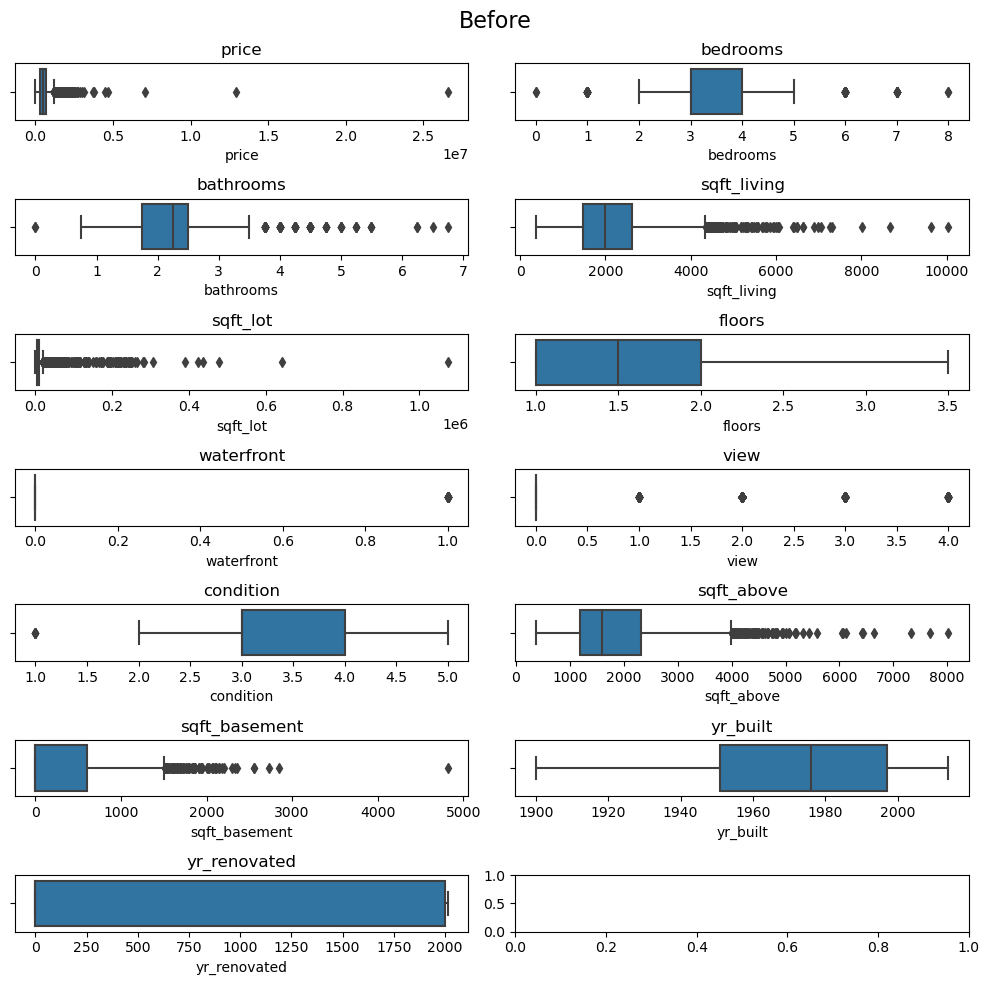

In [27]:
# Let's see the outliers using boxplots

fig, axes = plt.subplots(7, 2, figsize=(10, 10))

for i, column in enumerate(df.select_dtypes(include=["int64", "float64"])):
    sns.boxplot(x=df[column], ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(column)
    
fig.suptitle("Before", fontsize=16)

plt.tight_layout()
plt.show()

In [28]:
# Let's adjust the outliers to the threshold values

for column in df.select_dtypes(include=["int64", "float64"]).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4140.0,517682.984688,265420.188311,0.000,320000.00,460000.00,659125.0,1167812.500
bedrooms,4140.0,3.393720,0.855215,1.500,3.00,3.00,4.0,5.500
bathrooms,4140.0,2.142271,0.726022,0.625,1.75,2.25,2.5,3.625
sqft_living,4140.0,2119.095894,869.785608,370.000,1470.00,1980.00,2620.0,4345.000
sqft_lot,4140.0,8919.103623,5376.994415,638.000,5000.00,7676.00,11000.0,20000.000
floors,4140.0,1.514130,0.534941,1.000,1.00,1.50,2.0,3.500
waterfront,4140.0,0.000000,0.000000,0.000,0.00,0.00,0.0,0.000
view,4140.0,0.000000,0.000000,0.000,0.00,0.00,0.0,0.000
condition,4140.0,3.453019,0.676570,1.500,3.00,3.00,4.0,5.000
sqft_above,4140.0,1815.431401,805.113573,370.000,1190.00,1600.00,2310.0,3990.000


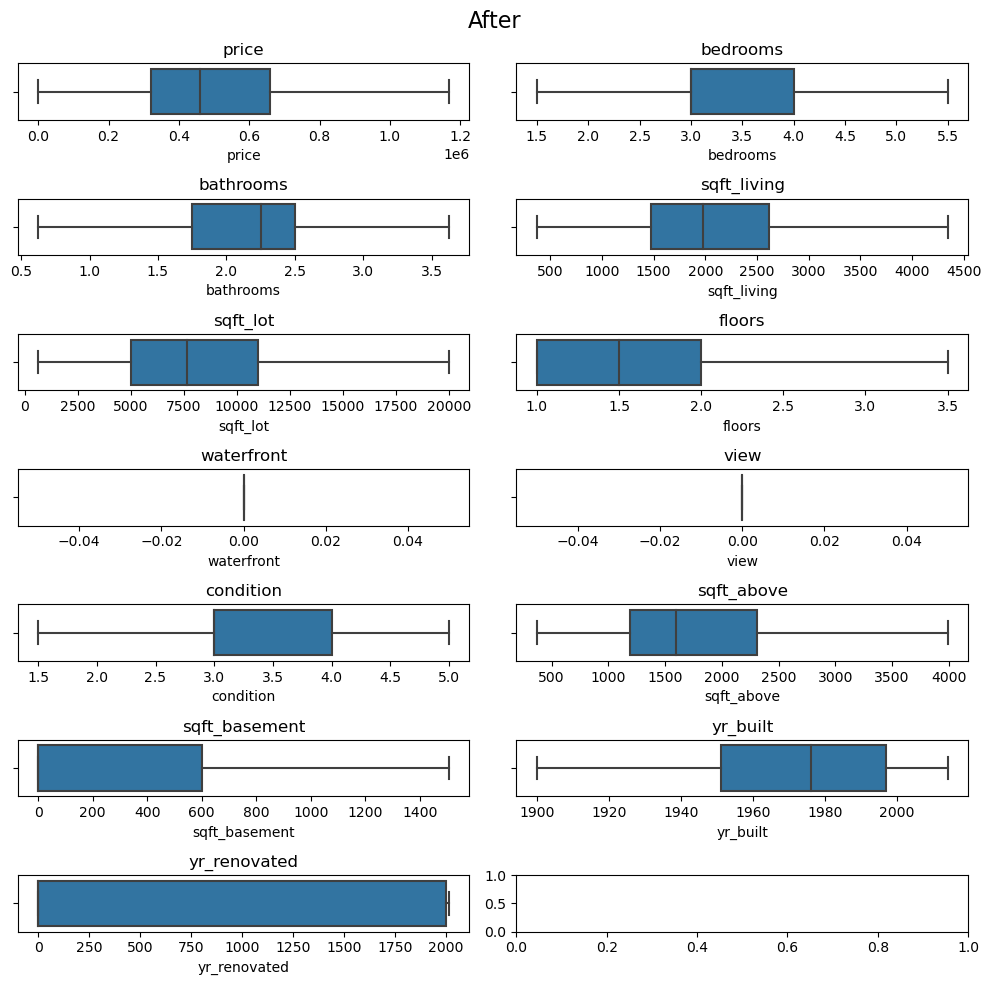

In [31]:
# Let's check

fig, axes = plt.subplots(7, 2, figsize=(10, 10))

for i, column in enumerate(df.select_dtypes(include=["int64", "float64"])):
    sns.boxplot(x=df[column], ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(column)
    
fig.suptitle("After", fontsize=16)

plt.tight_layout()
plt.show()

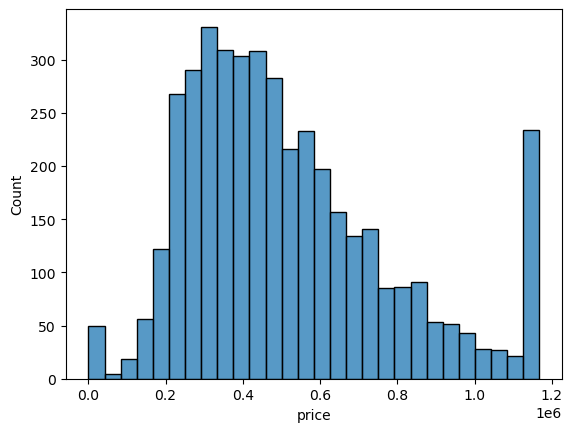

In [45]:
# A house price can't be 0, let's analyze prices

sns.histplot(data=df, x="price")
plt.show()

In [43]:
price_zero.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
3894,2014-05-05 00:00:00,0.0,3.0,1.75,1490.0,10125.0,1.0,0.0,0.0,4.0,1490.0,0.00,1962.0,0.0,3911 S 328th St,Federal Way,WA 98001,USA
3896,2014-05-05 00:00:00,0.0,4.0,2.75,2600.0,5390.0,1.0,0.0,0.0,4.0,1300.0,1300.00,1960.0,2001.0,2120 31st Ave W,Seattle,WA 98199,USA
3897,2014-05-05 00:00:00,0.0,5.5,2.75,3200.0,9200.0,1.0,0.0,0.0,4.0,1600.0,1506.25,1953.0,1983.0,12271 Marine View Dr SW,Burien,WA 98146,USA
3898,2014-05-06 00:00:00,0.0,5.0,3.50,3480.0,20000.0,2.0,0.0,0.0,4.0,2490.0,990.00,1983.0,0.0,21809 SE 38th Pl,Issaquah,WA 98075,USA
3901,2014-05-07 00:00:00,0.0,5.0,1.50,1500.0,7112.0,1.0,0.0,0.0,5.0,760.0,740.00,1920.0,0.0,14901-14999 12th Ave SW,Burien,WA 98166,USA


In [44]:
price_zero = df[df["price"] == 0]
price_zero.shape[0]

49

In [46]:
# Since we have only 49 observations with a price value of 0, we can remove them.

df = df[df["price"] > 0]

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4091.0,523883.538648,260849.977101,7800.000,325093.75,464600.00,660000.0,1167812.500
bedrooms,4091.0,3.386825,0.850442,1.500,3.00,3.00,4.0,5.500
bathrooms,4091.0,2.137650,0.722425,0.625,1.75,2.25,2.5,3.625
sqft_living,4091.0,2112.516989,865.244461,370.000,1460.00,1980.00,2610.0,4345.000
sqft_lot,4091.0,8895.385480,5373.384359,638.000,5000.00,7665.00,10952.5,20000.000
floors,4091.0,1.514300,0.535172,1.000,1.00,1.50,2.0,3.500
waterfront,4091.0,0.000000,0.000000,0.000,0.00,0.00,0.0,0.000
view,4091.0,0.000000,0.000000,0.000,0.00,0.00,0.0,0.000
condition,4091.0,3.450379,0.674261,1.500,3.00,3.00,4.0,5.000
sqft_above,4091.0,1810.864336,800.872222,370.000,1190.00,1600.00,2303.0,3990.000


In [51]:
df.nunique()

date               68
price            1467
bedrooms            6
bathrooms          14
sqft_living       461
sqft_lot         2383
floors              6
waterfront          1
view                1
condition           5
sqft_above        421
sqft_basement     157
yr_built          115
yr_renovated       59
street           4030
city               43
statezip           77
country             1
dtype: int64

In [52]:
# Since we only have one country (USA), we can remove this feature.

df = df.drop(columns=["country"])

In [54]:
# We should remove the "waterfront" and "view" features since all their values are 0.

df = df.drop(columns=["waterfront", "view"])

In [57]:
# We can extract the states from the "statezip" feature.

df[["state", "zip"]] = df["statezip"].str.extract(r'([A-Z]{2})\s*(\d{5})')

In [58]:
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,state,zip
0,2014-05-09 00:00:00,376000.0,3.0,2.000,1340.0,1384.0,3.0,3.0,1340.0,0.0,2008.0,0.0,9245-9249 Fremont Ave N,Seattle,WA 98103,WA,98103
1,2014-05-09 00:00:00,800000.0,4.0,3.250,3540.0,20000.0,2.0,3.0,3540.0,0.0,2007.0,0.0,33001 NE 24th St,Carnation,WA 98014,WA,98014
2,2014-05-09 00:00:00,1167812.5,5.0,3.625,4345.0,20000.0,2.0,3.0,3990.0,850.0,2010.0,0.0,7070 270th Pl SE,Issaquah,WA 98029,WA,98029
3,2014-05-09 00:00:00,324000.0,3.0,2.250,998.0,904.0,2.0,3.0,798.0,200.0,2007.0,0.0,820 NW 95th St,Seattle,WA 98117,WA,98117
4,2014-05-10 00:00:00,549900.0,5.0,2.750,3060.0,7015.0,1.0,5.0,1600.0,1460.0,1979.0,0.0,10834 31st Ave SW,Seattle,WA 98146,WA,98146


In [59]:
df["state"].nunique()

1

In [60]:
# We can also remove these features since there was only one state (WA) 

df = df.drop(columns=["street", "statezip", "state", "zip"])

In [61]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,2014-05-09 00:00:00,376000.0,3.0,2.000,1340.0,1384.0,3.0,3.0,1340.0,0.0,2008.0,0.0,Seattle
1,2014-05-09 00:00:00,800000.0,4.0,3.250,3540.0,20000.0,2.0,3.0,3540.0,0.0,2007.0,0.0,Carnation
2,2014-05-09 00:00:00,1167812.5,5.0,3.625,4345.0,20000.0,2.0,3.0,3990.0,850.0,2010.0,0.0,Issaquah
3,2014-05-09 00:00:00,324000.0,3.0,2.250,998.0,904.0,2.0,3.0,798.0,200.0,2007.0,0.0,Seattle
4,2014-05-10 00:00:00,549900.0,5.0,2.750,3060.0,7015.0,1.0,5.0,1600.0,1460.0,1979.0,0.0,Seattle


In [63]:
# We can extract years and months from "date" feature.

df["date"] = pd.to_datetime(df["date"])

df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

In [66]:
df.nunique()

date               68
price            1467
bedrooms            6
bathrooms          14
sqft_living       461
sqft_lot         2383
floors              6
condition           5
sqft_above        421
sqft_basement     157
yr_built          115
yr_renovated       59
city               43
year                1
month               3
dtype: int64

In [67]:
# We can remove the "year" feature since we have only one year (2014)

df = df.drop(columns=["year"])

In [69]:
# We can also remove the "date" feature

df = df.drop(columns=["date"])

In [77]:
df.nunique()

price            1467
bedrooms            6
bathrooms          14
sqft_living       461
sqft_lot         2383
floors              6
condition           5
sqft_above        421
sqft_basement     157
yr_built          115
yr_renovated       59
city               43
month               3
dtype: int64

In [78]:
df["month"] = df["month"].astype("int64")

In [79]:
df.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
condition        float64
sqft_above       float64
sqft_basement    float64
yr_built         float64
yr_renovated     float64
city              object
month              int64
dtype: object

In [82]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,month
0,376000.0,3.0,2.000,1340.0,1384.0,3.0,3.0,1340.0,0.0,2008.0,0.0,Seattle,5
1,800000.0,4.0,3.250,3540.0,20000.0,2.0,3.0,3540.0,0.0,2007.0,0.0,Carnation,5
2,1167812.5,5.0,3.625,4345.0,20000.0,2.0,3.0,3990.0,850.0,2010.0,0.0,Issaquah,5
3,324000.0,3.0,2.250,998.0,904.0,2.0,3.0,798.0,200.0,2007.0,0.0,Seattle,5
4,549900.0,5.0,2.750,3060.0,7015.0,1.0,5.0,1600.0,1460.0,1979.0,0.0,Seattle,5


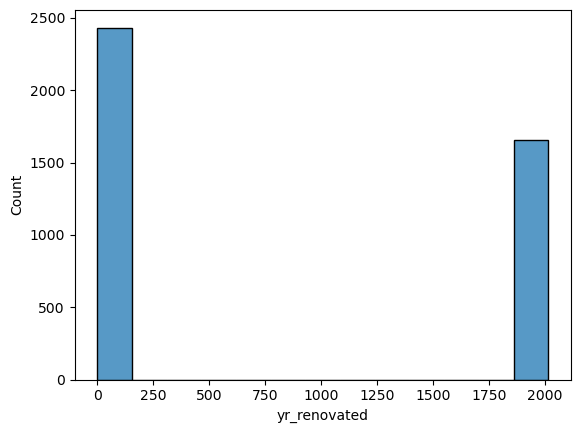

In [88]:
sns.histplot(data=df, x="yr_renovated")
plt.show()

In [89]:
df["yr_renovated"].unique()

array([   0., 2007., 2003., 2006., 1970., 2009., 1990., 1994., 2000.,
       1983., 2001., 2014., 1923., 1956., 1997., 1989., 1981., 1912.,
       2004., 1979., 1984., 2011., 1982., 1999., 2002., 1969., 2012.,
       2013., 1972., 2008., 2005., 1988., 1998., 1985., 1974., 1971.,
       1996., 2010., 1954., 1963., 1992., 1945., 1993., 1968., 1995.,
       1986., 1934., 1953., 1966., 1955., 1958., 1987., 1960., 1978.,
       1980., 1948., 1991., 1913., 1977.])

In [90]:
# We have interesting "yr_renovated" values, let's handle them

In [1]:
# TEST